In [ ]:
#First, we import all the required Libraries in our project
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import numpy as np

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance

import tensorflow.keras.backend as K
from skimage.io import imread
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array

K.clear_session()

In [ ]:
# We would define here the Size of Batch with Height and Weight of our Image
SizeofBatch = 32
HeightofImage = 250
WidthofImage = 250

In [ ]:
#First we would install the Opendatasets library
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset')

Skipping, found downloaded files in "./plant-disease-recognition-dataset" (use force=True to force download)


In [ ]:
#Here we will take the image dataset required for Training
Datasplit_forTraining = tf.keras.preprocessing.image_dataset_from_directory("/content/plant-disease-recognition-dataset/Train/Train",
image_size= (HeightofImage, WidthofImage),batch_size=SizeofBatch, shuffle=True)

In [ ]:
#Here we will take the image dataset required for Training
Datasplit_forTraining = tf.keras.preprocessing.image_dataset_from_directory("/content/plant-disease-recognition-dataset/Train/Train",
image_size= (HeightofImage, WidthofImage),batch_size=SizeofBatch, shuffle=True)

Found 1322 files belonging to 3 classes.


In [ ]:
#Here we take the image dataset requied for Validating
Datasplit_forValidation = tf.keras.preprocessing.image_dataset_from_directory("/content/plant-disease-recognition-dataset/Validation/Validation",
image_size= (HeightofImage, WidthofImage),batch_size=SizeofBatch, shuffle=True)

Found 60 files belonging to 3 classes.


In [ ]:
#Here we take the image dataset requied for Testing
Datasplit_forTesting = tf.keras.preprocessing.image_dataset_from_directory("/content/plant-disease-recognition-dataset/Test/Test",
image_size= (HeightofImage, WidthofImage),batch_size=SizeofBatch, shuffle=True)

Found 150 files belonging to 3 classes.


In [ ]:
#Its a display of all the Classes that we are using for Training
Classes_Targeted = Datasplit_forTraining.class_names
print(Classes_Targeted )

['Healthy', 'Powdery', 'Rust']


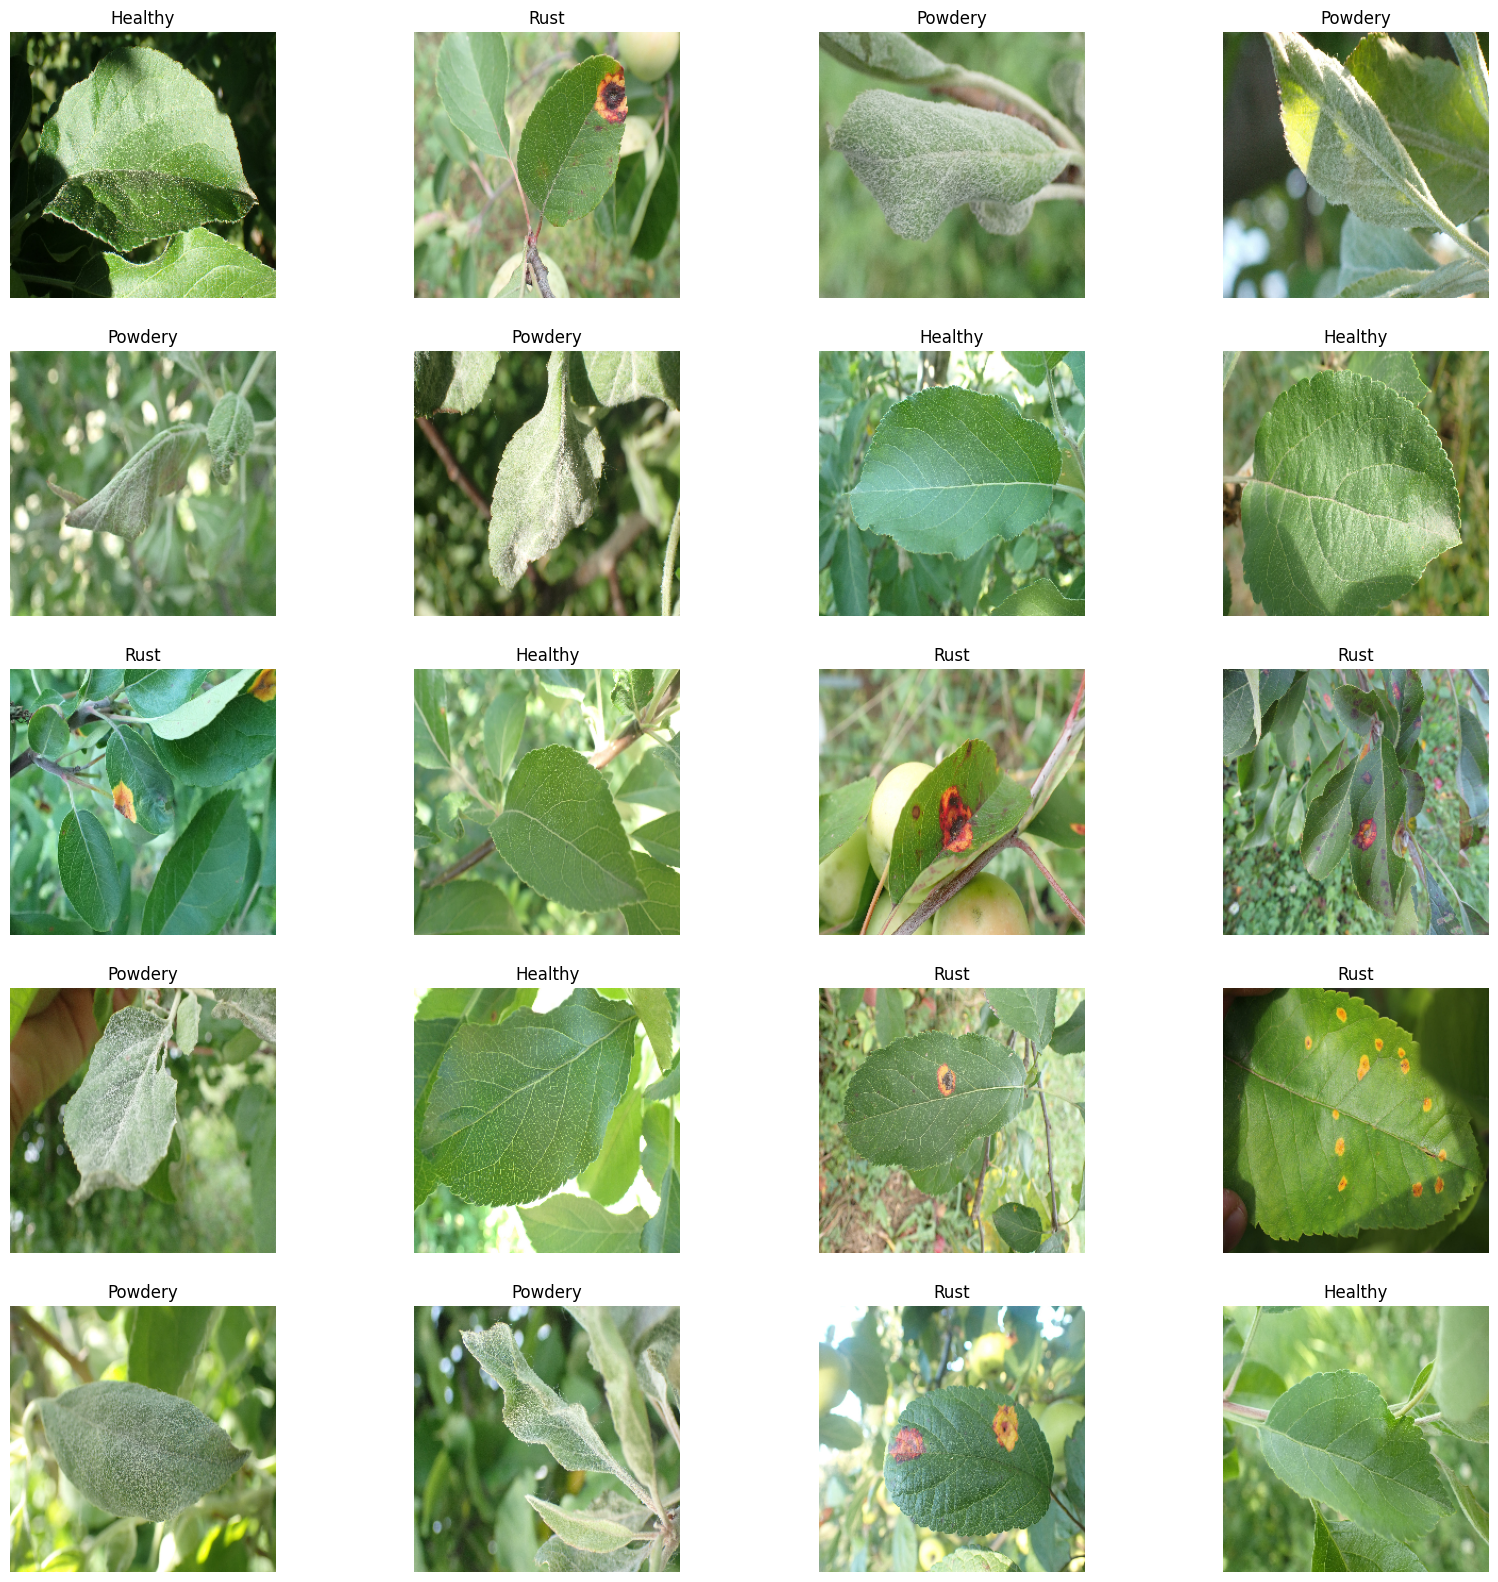

In [ ]:
plt.figure(figsize=(20,20))
for image_batch , image_label in Datasplit_forTraining.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(Classes_Targeted[image_label[i].numpy()])
        plt.axis("off")

In [ ]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(250,250),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
SizeofBatch = 32
HeightofImage = 250
WidthofImage = 250
Channels=3
input_shape=(SizeofBatch,HeightofImage,WidthofImage,Channels)


model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 250, 250, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 250, 250, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 248, 248, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 124, 124, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 122, 122, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 64)          0         
 g2D)                                                 

In [ ]:
#We now compile the model using Adam Optimizer function and sparse_categorical_crossentropy as the loss function
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#We now fit our Alexnet model to the Training dataset with parameters as 10 epochs
mod = model.fit(Datasplit_forTraining, batch_size=32, epochs = 10, validation_data= Datasplit_forValidation)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = Classes_Targeted[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 [==============================] - 0s 43ms/step


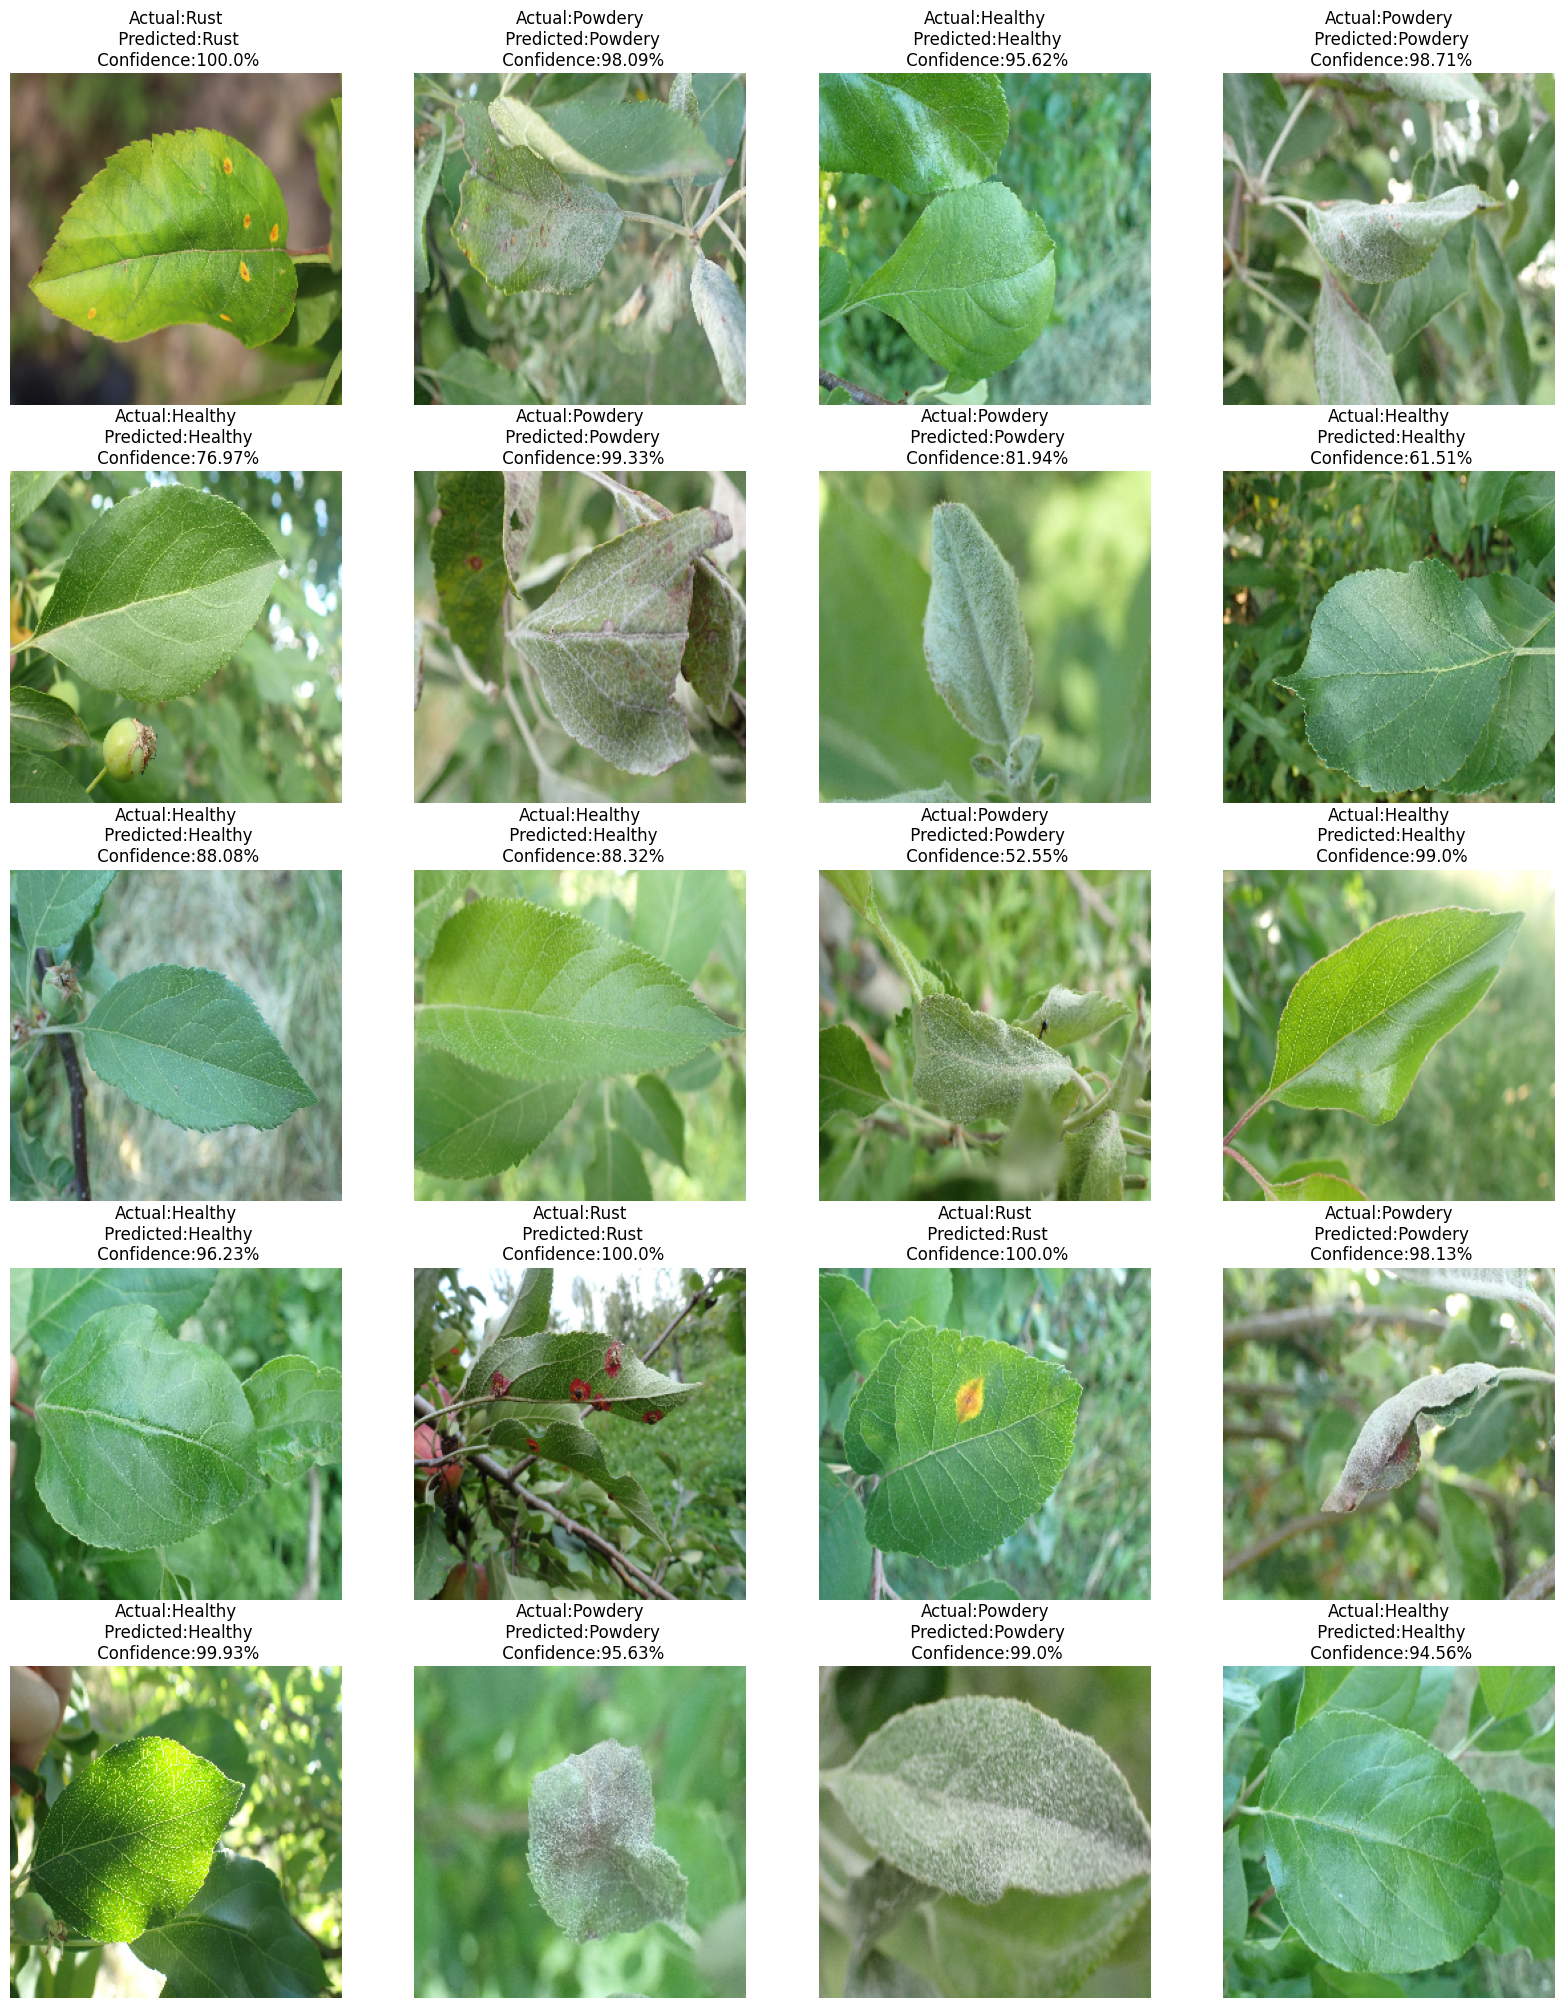

In [ ]:
plt.figure(figsize=(20,25))
for images , labels in Datasplit_forTesting.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = Classes_Targeted[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")

In [ ]:
model.save('/content/model.h5')

In [ ]:
# Example TensorFlow Lite conversion in Colab
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('/content/model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/model.tflite', 'wb') as f:
    f.write(tflite_model)